In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score


# Logistic regression

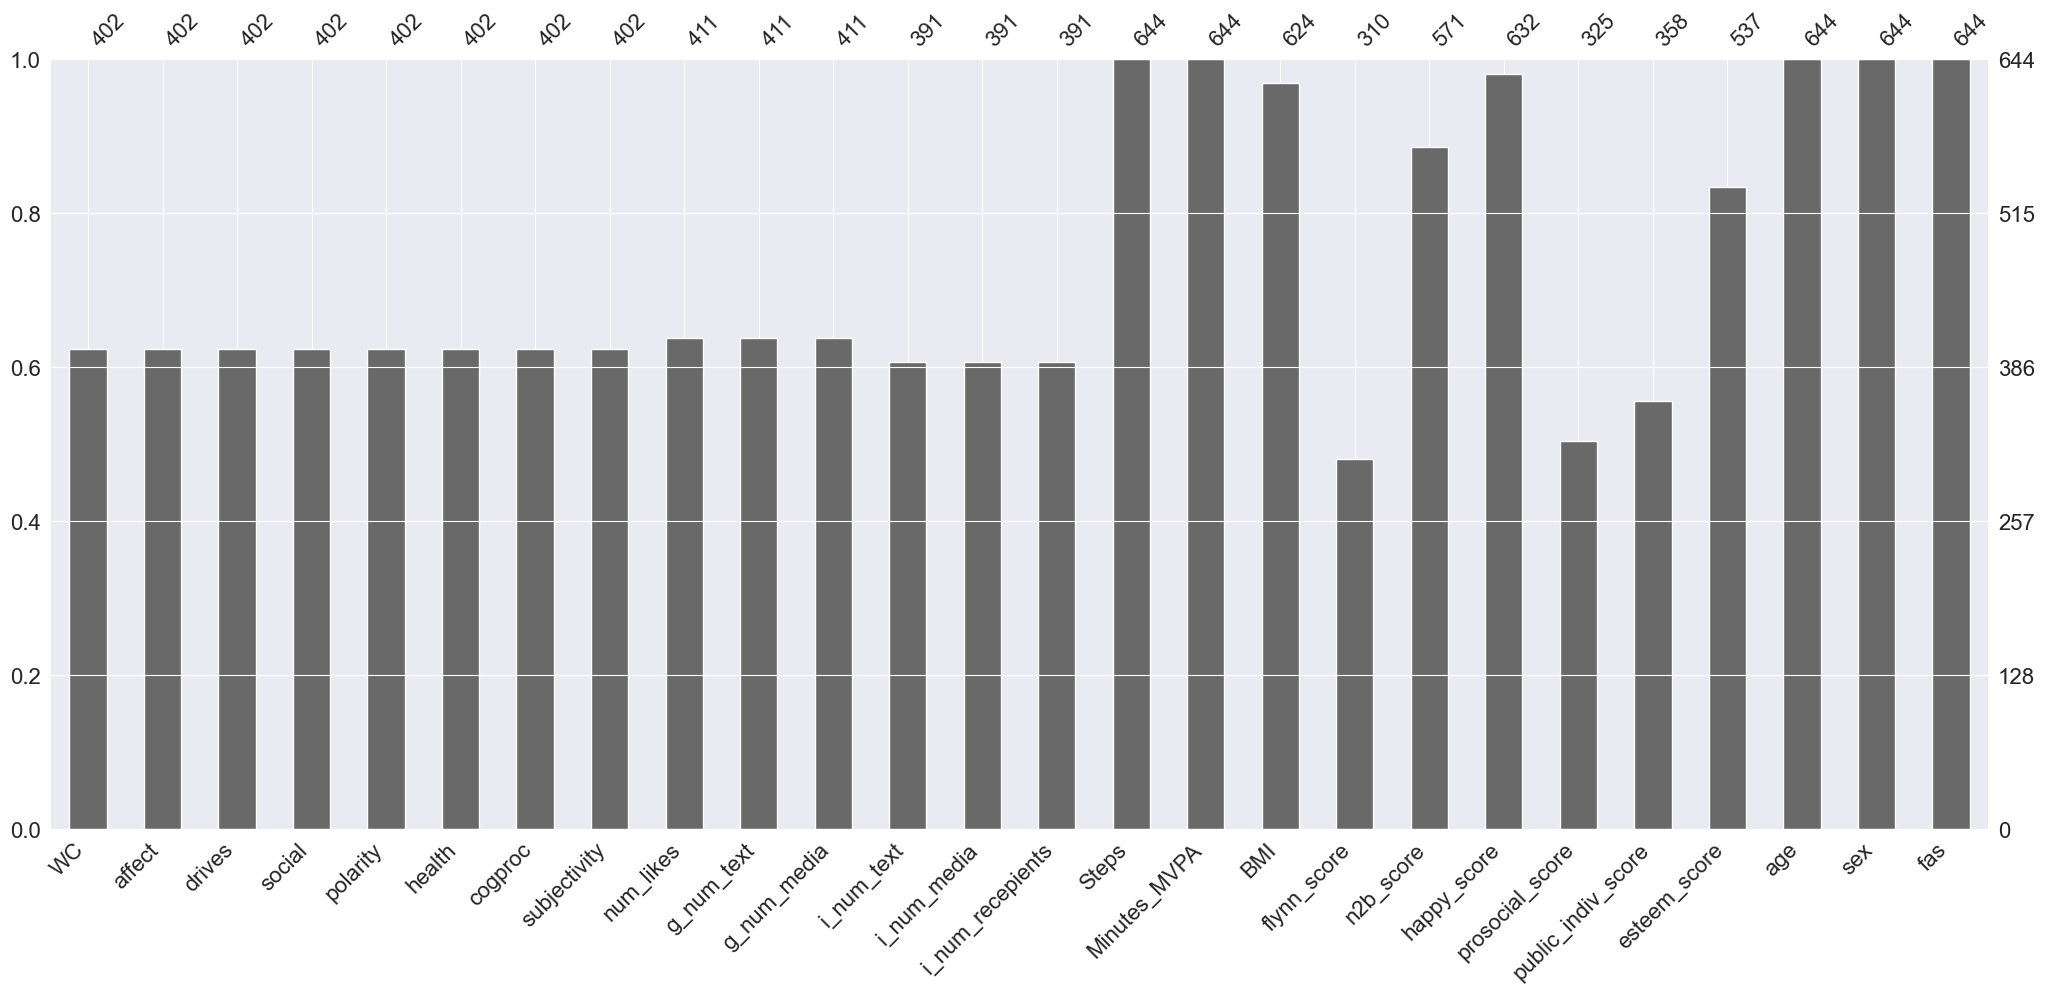

In [3]:
df_vars = pd.read_csv('../output/model_data.csv', sep=',', header=0)

df_final = df_vars.loc[:, df_vars.columns != 'Child']
df_final = df_final.loc[:, df_final.columns != 'influencer_ratio_total']

X = df_final.loc[:, df_final.columns != 'isInfluencer']
y = df_final.loc[:, df_final.columns == 'isInfluencer']

msno.bar(X)
plt.show()

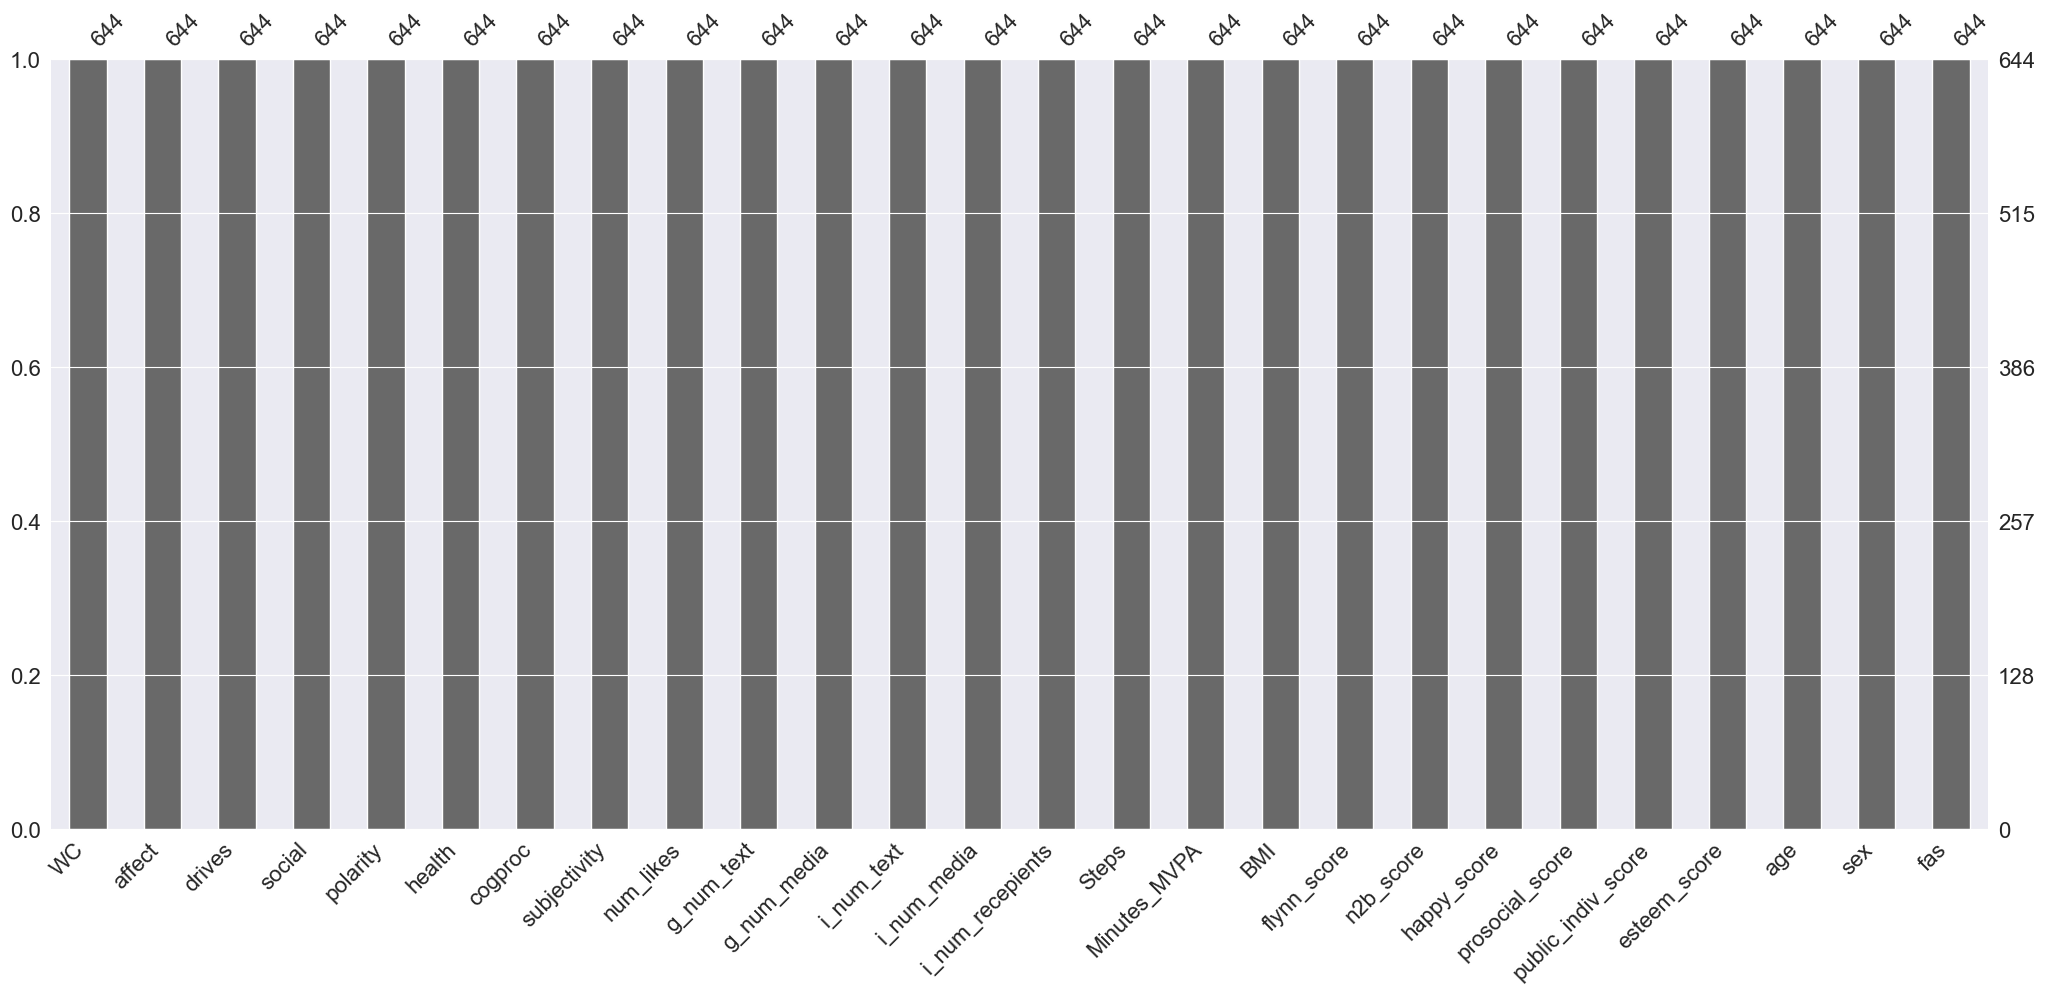

In [4]:
# fill missings (NA) with mean value
X = X.fillna(X.mean())
df_final = df_final.fillna(df_final.mean())
msno.bar(X)
plt.show()

In [6]:
# apply SMOTE resampling technique for unbalanced dataset
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns
os_data_X,os_data_y =os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['isInfluencer'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['isInfluencer']==0]))
print("Number of subscription",len(os_data_y[os_data_y['isInfluencer']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['isInfluencer']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['isInfluencer']==1])/len(os_data_X))

length of oversampled data is  872
Number of no subscription in oversampled data 436
Number of subscription 436
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


/Users/davidblok/Work EUR/GitHub/InfluencersPrediction/venv/lib/python3.9/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.9 is maybe too old for this OS.
  warnings.warn(


In [7]:
data_final_vars = df_final.columns.values.tolist()
y=['isInfluencer']
X=[i for i in data_final_vars if i not in y]


In [9]:
# RFE feature selection
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/Users/davidblok/Work EUR/GitHub/InfluencersPrediction/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
X = os_data_X
y = os_data_y

In [17]:
# Logistic regression
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.598804
         Iterations 6
                          Results: Logit
Model:               Logit            Method:           MLE       
Dependent Variable:  isInfluencer     Pseudo R-squared: 0.136     
Date:                2024-02-09 15:42 AIC:              1096.3143 
No. Observations:    872              BIC:              1220.3548 
Df Model:            25               Log-Likelihood:   -522.16   
Df Residuals:        846              LL-Null:          -604.42   
Converged:           1.0000           LLR p-value:      1.6793e-22
No. Iterations:      6.0000           Scale:            1.0000    
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
WC                  0.0965   0.0483  1.9988 0.0456  0.0019  0.1911
affect             -0.0377   0.0217 -1.7386 0.0821 -0

In [12]:
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/davidblok/Work EUR/GitHub/InfluencersPrediction/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davidblok/Work EUR/GitHub/InfluencersPrediction/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
y_pred = logreg.predict(X_test)


In [14]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[72 59]
 [42 89]]


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.55      0.59       131
           1       0.60      0.68      0.64       131

    accuracy                           0.61       262
   macro avg       0.62      0.61      0.61       262
weighted avg       0.62      0.61      0.61       262


In [16]:
bal_acc=balanced_accuracy_score(y_test,y_pred)
print(bal_acc)

0.6145038167938932
